<a href="https://colab.research.google.com/github/nickplas/Intro_to_ML_24-25/blob/main/notebooks/Lab-2.Polynomial_Regression_Bias_Variance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bias Variance Trade Off

In [2]:
# Import NumPy for numerical operations and data manipulation
import numpy as np

# Import Matplotlib for data visualization and plotting
import matplotlib.pyplot as plt

# Import the 'randint' function from the 'random' library for generating random integers
from random import randint

# Import the constant 'PI' from the 'math' library for mathematical calculations
from math import pi as PI

# Import mean_squared_error for evaluating regression models by calculating mean squared error
from sklearn.metrics import mean_squared_error

# Import train_test_split for splitting datasets into training and testing subsets
from sklearn.model_selection import train_test_split

* Generate data from the model $y=\sin(\pi\cdot x)+\varepsilon$, $\varepsilon\sim\mathcal{N}(0, \sigma)$
* Interpolate the data with different polynomial fittings.
* To test for generalization error we split the data into training and test.

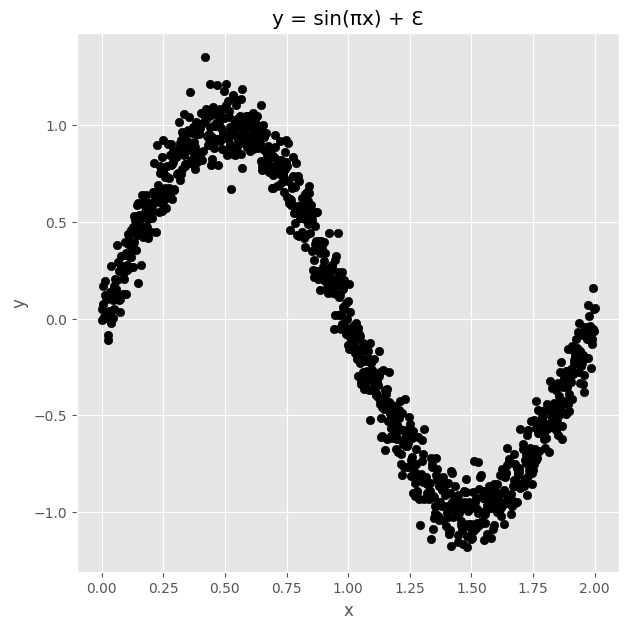

In [3]:
# Set the plotting style to 'ggplot', which is a predefined style in Matplotlib.
plt.style.use('ggplot')

# Uncomment the line below if you want to ensure reproducibility of random numbers.
# It sets a seed for random number generation.
np.random.seed(42)

# Define the number of observations.
NUM_OBS = 1000

# Generate an array of predictor values 'x' that are evenly spaced from 0 to 2.
x = np.linspace(0, 2, num=NUM_OBS)

# Generate random noise 'eps' using a normal distribution with mean 0 and standard deviation 0.1.
eps = np.random.normal(0, 0.1, NUM_OBS)

# Generate the outcome variable 'y' as the sine of 'πx' plus the noise 'eps'.
y = np.sin(PI * x) + eps

# Create a figure for plotting with a specified size.
fig = plt.figure(figsize=(7, 7))

# Create an axes object for the plot.
ax = plt.axes()

# Set the title of the plot.
ax.set_title('y = sin(πx) + Ɛ')

# Set the label for the x-axis.
ax.set_xlabel("x")

# Set the label for the y-axis.
ax.set_ylabel("y")

# Create a scatter plot of 'x' versus 'y' with black markers ('k').
ax.scatter(x, y, c='k')


We use the Mean Square error to measure the fit error.

$$
MSE = \frac{1}{N}\sum_{i=1}^{N}\;(y_{i}-y_{i}^{pred})^{2}
$$

$$
MSE = Bias^{2}+ Variance + Irriducible Error
$$


**BIAS**


**Bias takes into account the difference between the model prediction and the real outcome**.

It depends mainly on the model we choose to solve our problem, and how the model assumptions can suitably interpret the relationship between predictors and outcome.

By observing our train set plot, we notice a non-linear trend. If we chose to model the relationship between $x$ and $y$ with a linear regression, the model assumptions would clearly fail to explain our function, which we know to be non-linear. In this case, we would obtain a model with high bias.

We can empirically assess that a model suffers from high bias because it shows a **high error on the train set**. Or, in other words, a low training performance: this condition goes under the name of **underfitting**.

High bias:

* Model assumptions fail to explain the relationship between predictors and outcome.

* Involves “simpler” (less flexible) models, such as linear regression.

* Leads to underfitting (poor train set performances).

**VARIANCE**

**Variance measures how different choices of the train sets would affect the the model parameters**.

When we train a machine learning model, we want that, by selecting a slightly different train set, the function would not change significantly. Otherwise, we would have obtained a model unable to generalize in front of small variations in the input data: this goes under the name of overfitting.

Intuitively, models with fewer assumptions do not suffer from high variance, as they do not change in front of small variations in the train set. Therefore, high variance is a problem that affects more flexible models, such as decision trees.

As the model is complex enough to overfit on a train set, we would expect high train performances (or low training error), but also poor test performances, as the model would require significant changes in the parameters to explain small variations in the data.

High variance:

- Involves more “complex” models (more flexible), such as decision trees.

- Leads to overfitting (poor test set performances).

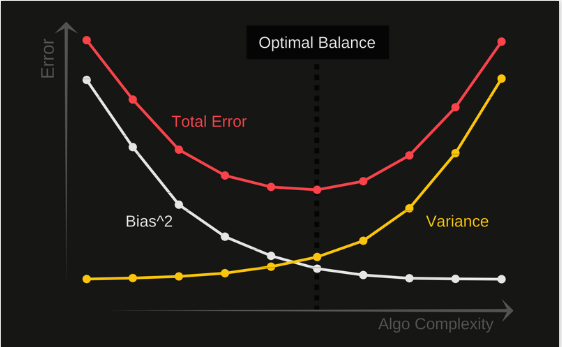

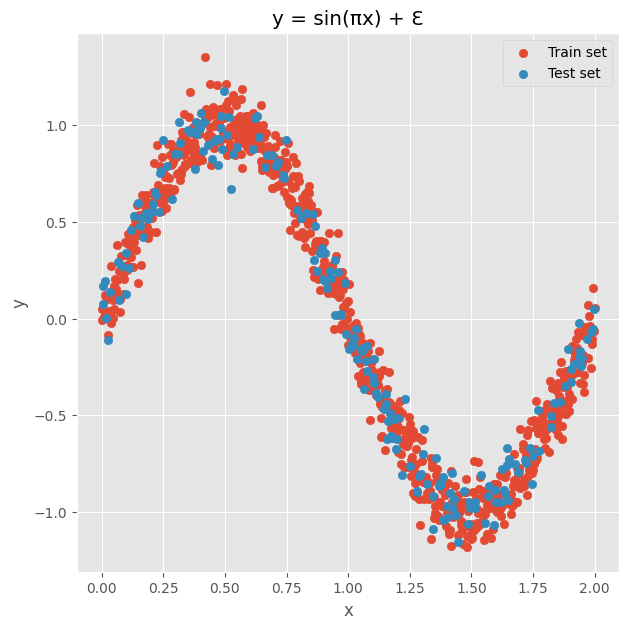

In [4]:
# splitting training and test data using sklearn
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

fig = plt.figure(figsize = (7,7))
ax = plt.axes()
ax.set_title('y = sin(πx) + Ɛ')
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.scatter(x_train, y_train, label = "Train set")
ax.scatter(x_test, y_test, label = "Test set")
ax.legend()

In [5]:
# Define a function to fit and visualize polynomial models
def fit_plot_poly(x_train, x_test, y_train, y_test, n_models):
    # Create a list of colors for plotting
    colors = iter(plt.cm.rainbow(np.linspace(0, 1, n_models)))

    # Create a 2x2 grid of subplots for visualization
    fig, axs = plt.subplots(2, 2, figsize=(20, 20))

    # Set titles for subplots
    axs[0, 0].set_title('Train Set Predictions')
    axs[1, 0].set_title('Test Set Predictions')
    axs[0, 1].set_title('Train Set MSE')
    axs[1, 1].set_title('Test Set MSE')

    # Set labels for axes
    axs[0, 0].set_xlabel("x train")
    axs[0, 0].set_ylabel("y")
    axs[0, 0].set_ylim([-3, 3])

    axs[1, 0].set_xlabel("x test")
    axs[1, 0].set_ylabel("y")
    axs[1, 0].set_ylim([-3, 3])

    axs[0, 1].set_xlabel("polynomial degree")
    axs[0, 1].set_ylabel("train MSE")

    axs[1, 1].set_xlabel("polynomial degree")
    axs[1, 1].set_ylabel("test MSE")

    # Scatter plot of training and test data points
    axs[0, 0].scatter(x_train, y_train, c='k', label="y train")
    axs[1, 0].scatter(x_test, y_test, c='k', label="y test")

    # Lists to store train and test MSE for each degree of polynomial
    train_mse = []
    test_mse = []

    for k in range(0, n_models):
        c = next(colors)

        # Fit a k-th degree polynomial to training data
        fit_coeff = np.polyfit(x_train, y_train, deg=k + 1)

        # Predict y values for training and test data using the polynomial fit
        # we use the numpy functions for this
        y_train_pred = np.polyval(fit_coeff, x_train)
        y_test_pred = np.polyval(fit_coeff, x_test)

        # Scatter plot of polynomial predictions
        axs[0, 0].scatter(x_train, y_train_pred, color=c, label="deg: {}".format(k + 1), s=1)
        axs[1, 0].scatter(x_test, y_test_pred, color=c, label="deg: {}".format(k + 1), s=1)

        # Compute train and test MSE for the k-th degree polynomial
        # use sklearn to compute the error
        iter_train_mse = mean_squared_error(y_train_pred, y_train)
        iter_test_mse = mean_squared_error(y_test_pred, y_test)

        # Append MSE values to the lists
        train_mse.append(iter_train_mse)
        test_mse.append(iter_test_mse)

        # Plot MSE values for each degree
        axs[0, 1].plot(k + 1, iter_train_mse, color=c, label="deg: {}".format(k + 1), marker='D', markersize=12,
                       markeredgecolor='black', markeredgewidth=3)
        axs[1, 1].plot(k + 1, iter_test_mse, color=c, label="deg: {}".format(k + 1), marker='D', markersize=12,
                       markeredgecolor='black', markeredgewidth=3)

    # Plot dashed lines to interpolate MSE measures
    axs[0, 1].plot(range(1, n_models + 1), train_mse, 'k--')
    axs[1, 1].plot(range(1, n_models + 1), test_mse, 'k--')

    # Add legends to the plots
    axs[0, 1].legend(loc="upper right", bbox_to_anchor=(1.2, 1.01), prop={'size': 12})
    axs[1, 1].legend(loc="upper right", bbox_to_anchor=(1.2, 1.01), prop={'size': 12})

    # Return the train and test MSE lists
    return train_mse, test_mse


C:\Users\39346\AppData\Local\Temp\ipykernel_1404\73070221.py:42: RankWarning: Polyfit may be poorly conditioned
  fit_coeff = np.polyfit(x_train, y_train, deg=k + 1)
C:\Users\39346\AppData\Local\Temp\ipykernel_1404\73070221.py:42: RankWarning: Polyfit may be poorly conditioned
  fit_coeff = np.polyfit(x_train, y_train, deg=k + 1)
C:\Users\39346\AppData\Local\Temp\ipykernel_1404\73070221.py:42: RankWarning: Polyfit may be poorly conditioned
  fit_coeff = np.polyfit(x_train, y_train, deg=k + 1)
C:\Users\39346\AppData\Local\Temp\ipykernel_1404\73070221.py:42: RankWarning: Polyfit may be poorly conditioned
  fit_coeff = np.polyfit(x_train, y_train, deg=k + 1)


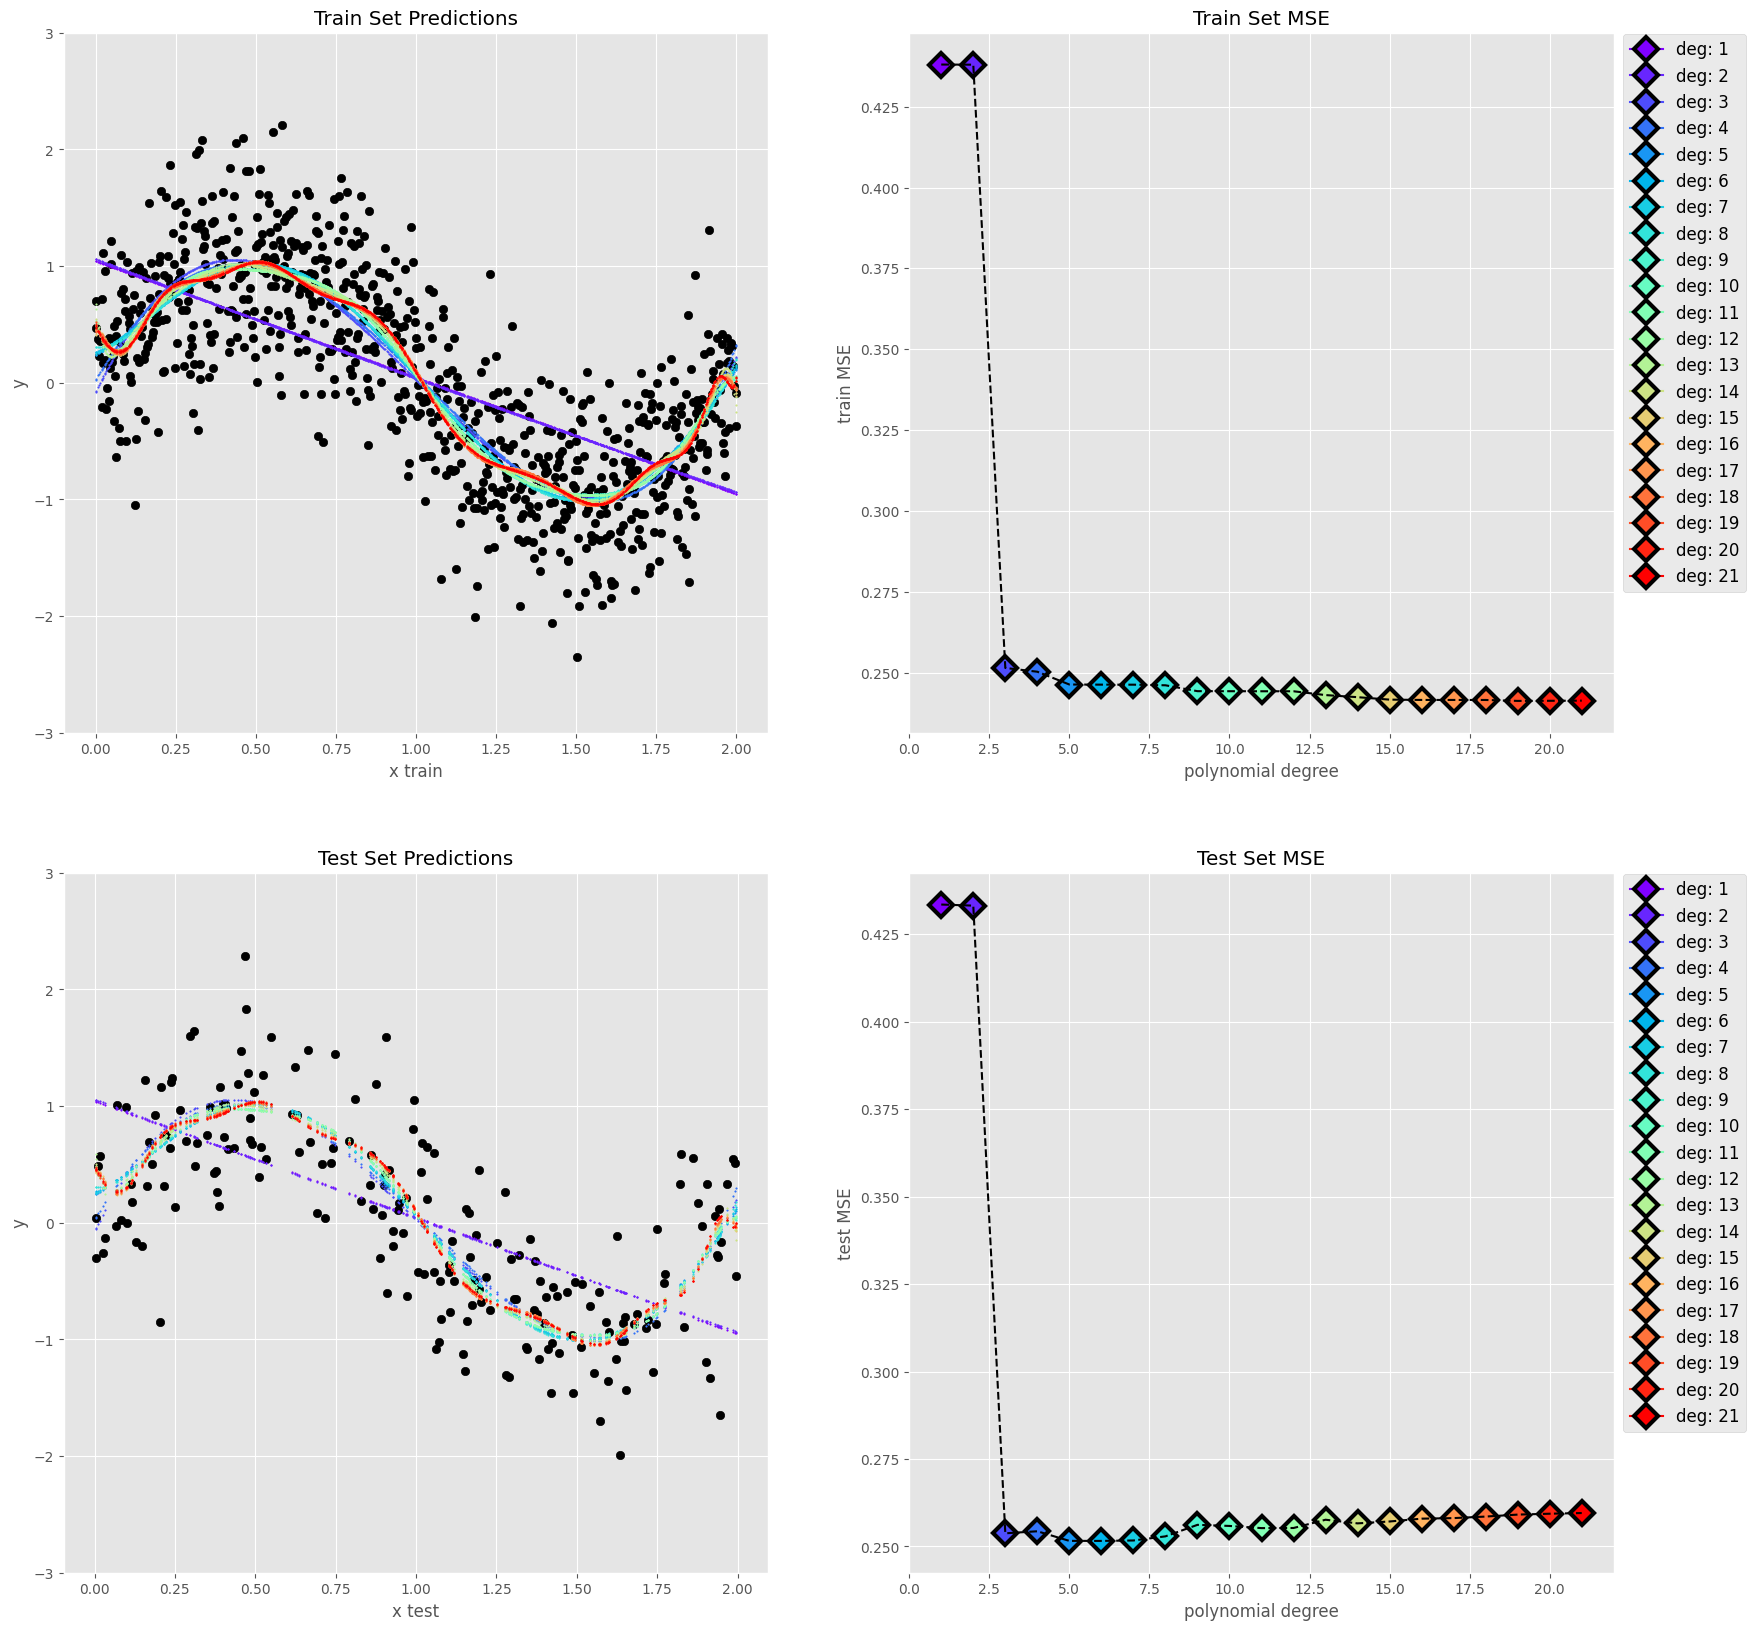

In [6]:
# build the dataset and split in train and test sets
x = np.linspace(0, 2, num = NUM_OBS)
eps = np.random.normal(0, 0.5, NUM_OBS)
y = np.sin(PI*x)+ eps
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)
# number of polynomial models to investigate
NUM_MODELS = 21
train_mse, test_mse = fit_plot_poly(x_train, x_test, y_train, y_test, NUM_MODELS)

In [7]:
print(train_mse)
print(test_mse)

[0.4380286989037108, 0.43798256134824726, 0.25142397334103317, 0.2502543323293315, 0.24630157275260786, 0.24626101139715323, 0.24624944121062192, 0.24606301831372476, 0.24424277520551407, 0.2442286553740255, 0.24421217779909263, 0.24421167197059962, 0.24303098259844577, 0.24238610556994075, 0.2416278356506281, 0.24153210559269853, 0.24153100030232508, 0.24152039702987593, 0.24123206863508082, 0.24126733297119152, 0.24131044699156576]
[0.43352570991620837, 0.43321608068960415, 0.25374386206335325, 0.2543300433730152, 0.25158154806435035, 0.25157503685050503, 0.25169640809686533, 0.252876158385361, 0.2561671275123904, 0.2558515991025933, 0.25523317642418236, 0.2552660393832206, 0.25762821200903496, 0.2565883413029127, 0.257127764130663, 0.2579363865472252, 0.2580961961214927, 0.2585351464431742, 0.25909693574969467, 0.25934942545886375, 0.25954385579374967]


If we look at the MSE plots over the polynomial degree (model complexity) from left to right, the increasing complexity of the models leads to a decrease in the train error (lower bias), but also a significant increase in the test error (high variance).

On the other hand, we also notice that the decreasing complexity of the models results in a poor train set performance (high bias) as well as better generalization on the test set (low variance).

The best fit is represented by the polynomial degree that minimizes the test error.



In [8]:
print("Best fit polynomial degree: ", test_mse.index(min(test_mse)))

Best fit polynomial degree:  5


In conclusion, the best fit shows two characteristics: it fits well the train set (low train set error) and it generalizes well on unseen data (low test set error), as it minimizes both variance and bias. In our example, models with higher error presented either high variance or high bias. Hence, the name bias-variance trade-off.

What happens if we change the level of noise in the data? Why?


*   Try to visually explore such variability using ther previoused defined function and think about an answer to the above question!



**Further sources**



*   [Machine Learning Fundamentals: Bias and Varianceo](https://www.youtube.com/watch?v=EuBBz3bI-aA)
*   [Bias-Variance Tradeoff : Data Science Basics](https://www.youtube.com/watch?v=YIPsfEtJppE)

